# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# The dataset contains the following columns:

* attrition (float64): This likely represents whether an employee left the company (attrition indicator).
* performance_rating (float64): A numeric rating, potentially between a certain range.
* sales_quota_pct (float64): Percentage of sales quota achieved.
* recruiting_source (object): Source through which the candidate was recruited, but some values are missing (NaN).

# Loading Dataset

In [2]:
df = pd.read_csv('Recruitment_Data_updated.csv')

# Viewing the dataset

In [3]:
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,0.000707,2.976686,0.604739,Applied Online
1,-0.019452,2.989157,0.396567,NaN
2,-0.009998,2.993355,0.206242,Applied Online
3,-0.003004,1.989966,-0.475037,NaN
4,-0.025405,3.016559,0.345470,Campus


In [4]:
df.tail()

,attrition,performance_rating,sales_quota_pct,recruiting_source
107349,0.002813,3.003288,1.041518,NaN
107350,0.998179,2.997723,1.349780,NaN
107351,-0.016202,2.992603,0.791637,NaN
107352,-0.023847,2.005391,0.749299,NaN
107353,-0.009020,1.988047,2.896500,Applied Online


In [5]:
df.shape

(107354, 4)

In [6]:
df.dtypes

attrition             float64
performance_rating    float64
sales_quota_pct       float64
recruiting_source      object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107354 entries, 0 to 107353
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   attrition           107354 non-null  float64
 1   performance_rating  107354 non-null  float64
 2   sales_quota_pct     107354 non-null  float64
 3   recruiting_source   57753 non-null   object 
dtypes: float64(3), object(1)
memory usage: 3.3+ MB


# to get a quick summary_stats for numerical data, helping with data quality checks and initial insights for all numeric columns

In [8]:
df.describe()

,attrition,performance_rating,sales_quota_pct
count,107354.000000,107354.000000,107354.000000
mean,0.213198,2.895066,1.082606
std,0.409639,0.682871,0.710279
min,-0.042386,0.964432,-0.739909
25%,-0.004684,2.022333,0.589342
50%,0.003484,2.998005,1.069800
75%,0.016809,3.010101,1.532299
max,1.038685,5.027383,3.701694


# Data Cleaning and Handling Missing Values
* Check for missing values and decide on strategies for handling them, especially in recruiting_source.
* Remove or handle any erroneous values in sales_quota_pct.

**Step 1:Check for Missing Values** 

In [9]:
# Count of missing values in each column
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = round(((missing_values / len(df)) * 100),2)

# Display missing values and their percentages
missing_info = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})
print(missing_info)

                    Missing Count  Missing Percentage
attrition                       0                 0.0
performance_rating              0                 0.0
sales_quota_pct                 0                 0.0
recruiting_source           49601                46.2


**Step 2: Analyze the Impact of Missing Values in recruiting_source**

In [10]:
# Display rows where 'recruiting_source' is missing
missing_recruiting_source = df[df['recruiting_source'].isnull()]
print(missing_recruiting_source.head())

    attrition  performance_rating  sales_quota_pct recruiting_source
1   -0.019452            2.989157         0.396567               NaN
3   -0.003004            1.989966        -0.475037               NaN
6   -0.003765            3.997125         2.067969               NaN
7    0.003744            2.984290         0.848081               NaN
11  -0.003309            2.985665         1.558246               NaN


**Step 3: Choose a Strategy & verify handling**

In [11]:
# Impute with the most common recruiting source
most_common_source = df['recruiting_source'].mode()[0]
df['recruiting_source'].fillna(most_common_source, inplace=True)

# Verify no missing values remain in 'recruiting_source'
print(df['recruiting_source'].isnull().sum())

0


In [12]:
# To check imputed values in recruiting source
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,0.000707,2.976686,0.604739,Applied Online
1,-0.019452,2.989157,0.396567,Applied Online
2,-0.009998,2.993355,0.206242,Applied Online
3,-0.003004,1.989966,-0.475037,Applied Online
4,-0.025405,3.016559,0.345470,Campus


* successfully imputed most common source in place of null values in 'recruitng_source' column

In [13]:
# Display rows where 'sales_quota_pct' is outside [0, 1] range
out_of_range = df[(df['sales_quota_pct'] < 0) | (df['sales_quota_pct'] > 1)]
print(out_of_range)

        attrition  performance_rating  sales_quota_pct recruiting_source
3       -0.003004            1.989966        -0.475037    Applied Online
6       -0.003765            3.997125         2.067969    Applied Online
9        0.989205            2.996491         1.124045    Applied Online
10       0.995970            2.981442         1.482158            Campus
11      -0.003309            2.985665         1.558246    Applied Online
...           ...                 ...              ...               ...
107347   0.022473            2.993034         1.055082            Campus
107348  -0.002790            2.009401        -0.117912    Applied Online
107349   0.002813            3.003288         1.041518    Applied Online
107350   0.998179            2.997723         1.349780    Applied Online
107353  -0.009020            1.988047         2.896500    Applied Online

[63082 rows x 4 columns]


In [14]:
# Clip 'sales_quota_pct' values to the range [0, 1]
df['sales_quota_pct'] = df['sales_quota_pct'].clip(lower=0, upper=1)

# Remove rows where 'sales_quota_pct' is outside [0, 1]
df = df[(df['sales_quota_pct'] >= 0) & (df['sales_quota_pct'] <= 1)]

# Set out-of-range values to NaN
df['sales_quota_pct'] = df['sales_quota_pct'].where((df['sales_quota_pct'] >= 0) & (df['sales_quota_pct'] <= 1))

# Check if there are any values outside the range [0, 1]
out_of_range_after = df[(df['sales_quota_pct'] < 0) | (df['sales_quota_pct'] > 1)]
print(out_of_range_after) 

Empty DataFrame
Columns: [attrition, performance_rating, sales_quota_pct, recruiting_source]
Index: []


In [15]:
# Convert to numeric if needed, with error handling
df['attrition'] = pd.to_numeric(df['attrition'], errors='coerce')
df['performance_rating'] = pd.to_numeric(df['performance_rating'], errors='coerce')
df['sales_quota_pct'] = pd.to_numeric(df['sales_quota_pct'], errors='coerce')

# Convert recruiting_source to category
df['recruiting_source'] = df['recruiting_source'].astype('category')

# Convert attrition to integer (only if values are binary like 0 or 1)
df['attrition'] = df['attrition'].astype(int)

# Check data types after conversion
print(df.dtypes)

attrition                int32
performance_rating     float64
sales_quota_pct        float64
recruiting_source     category
dtype: object


# Exploratory Data Analysis (EDA)
**1. Univariate Analysis**
* Attrition Distribution:

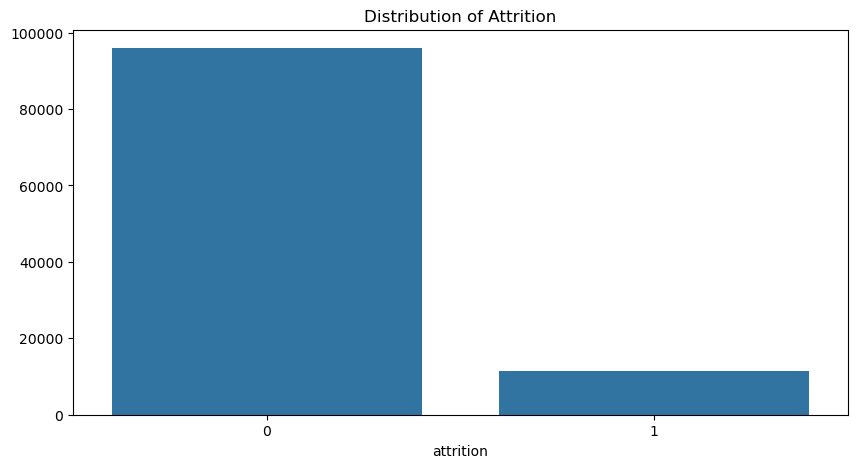

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['attrition'].value_counts().index, y=df['attrition'].value_counts().values)
plt.title('Distribution of Attrition')
plt.show()

**Higher attrition values indicate frequent employee departures, which could be areas of concern.**

* Performance Rating Distribution:

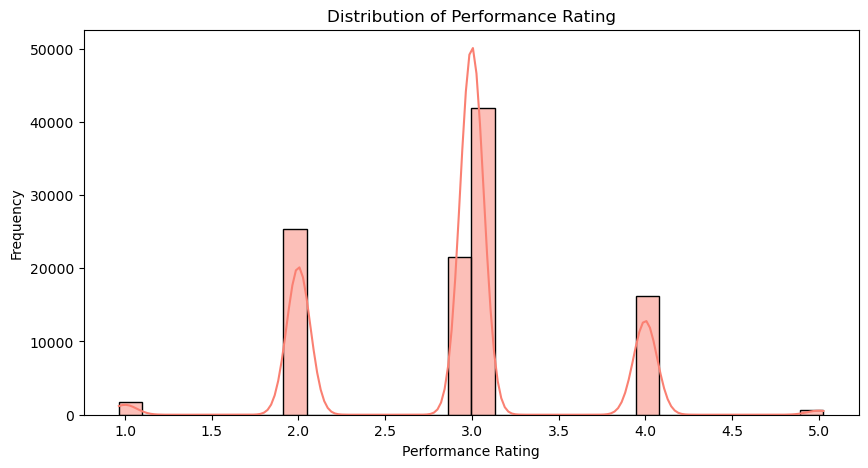

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df['performance_rating'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Frequency')
plt.show()

**This shows the performance levels of employees, with most clustered around average ratings.**

* Sales Quota Percentage Distribution:

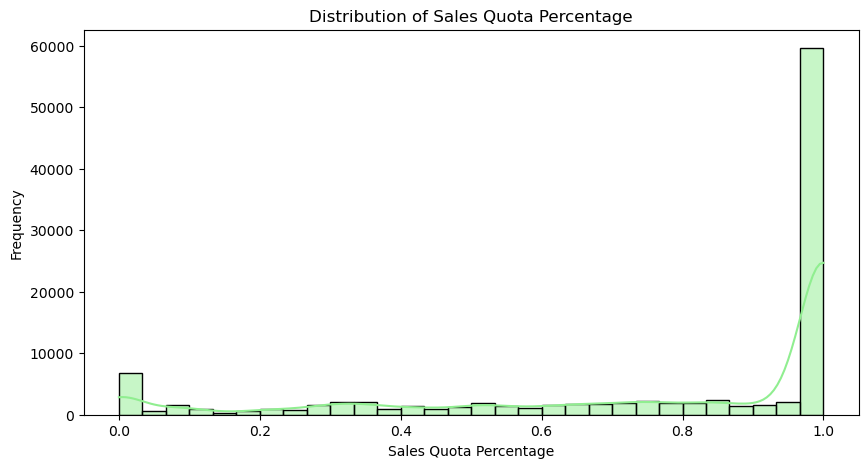

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(df['sales_quota_pct'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Sales Quota Percentage')
plt.xlabel('Sales Quota Percentage')
plt.ylabel('Frequency')
plt.show()

**Peaks around 1 suggest that many employees meet or exceed sales targets**

**2. Bivariate Analysis**
* Attrition Rate by Recruiting Source

recruiting_source
Campus            0.109938
Applied Online    0.105788
Referral          0.104613
Search Firm       0.102990
Name: attrition, dtype: float64


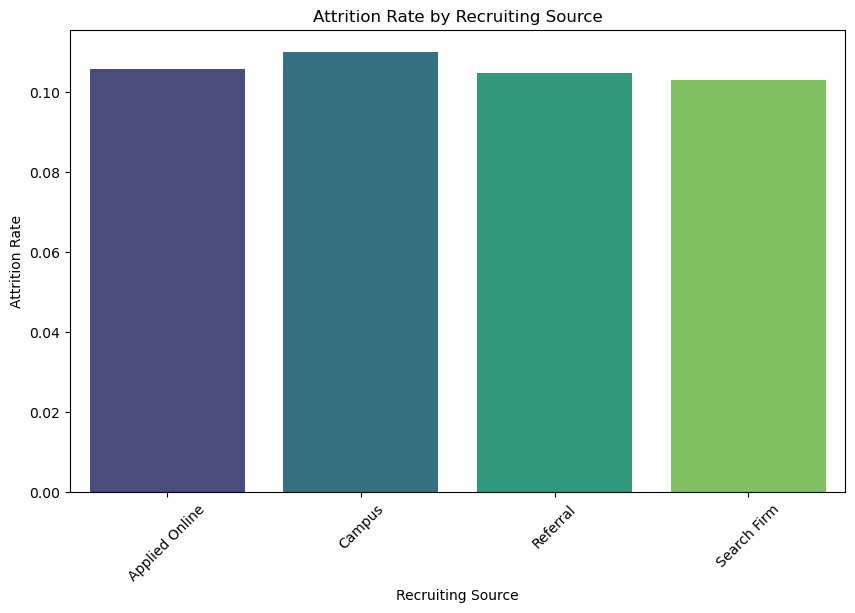

In [19]:
# Calculate attrition rate by recruiting source
attrition_rate_by_source = df.groupby('recruiting_source')['attrition'].mean().sort_values(ascending=False)

# Display the result
print(attrition_rate_by_source)

plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_rate_by_source.index, y=attrition_rate_by_source.values, palette="viridis")
plt.title("Attrition Rate by Recruiting Source")
plt.xlabel("Recruiting Source")
plt.ylabel("Attrition Rate")
plt.xticks(rotation=45)
plt.show()

**Higher attrition rates in certain recruiting sources could indicate the need for more stringent candidate screening.**

* Average Performance Rating by Recruiting Source

recruiting_source
Referral          2.906395
Search Firm       2.897311
Applied Online    2.893772
Campus            2.893206
Name: performance_rating, dtype: float64


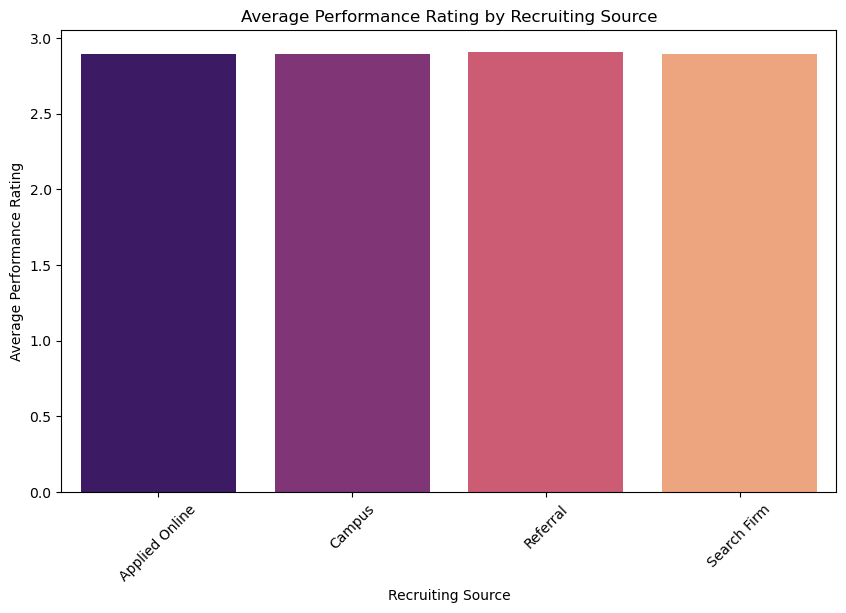

In [20]:
# Calculate average performance rating by recruiting source
avg_performance_by_source = df.groupby('recruiting_source')['performance_rating'].mean().sort_values(ascending=False)

# Display the result
print(avg_performance_by_source)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_performance_by_source.index, y=avg_performance_by_source.values, palette="magma")
plt.title("Average Performance Rating by Recruiting Source")
plt.xlabel("Recruiting Source")
plt.ylabel("Average Performance Rating")
plt.xticks(rotation=45)
plt.show()

**Sources with higher average performance ratings may be optimal for attracting high-performing candidates.**

* Sales Quota Percentage by Recruiting Source:

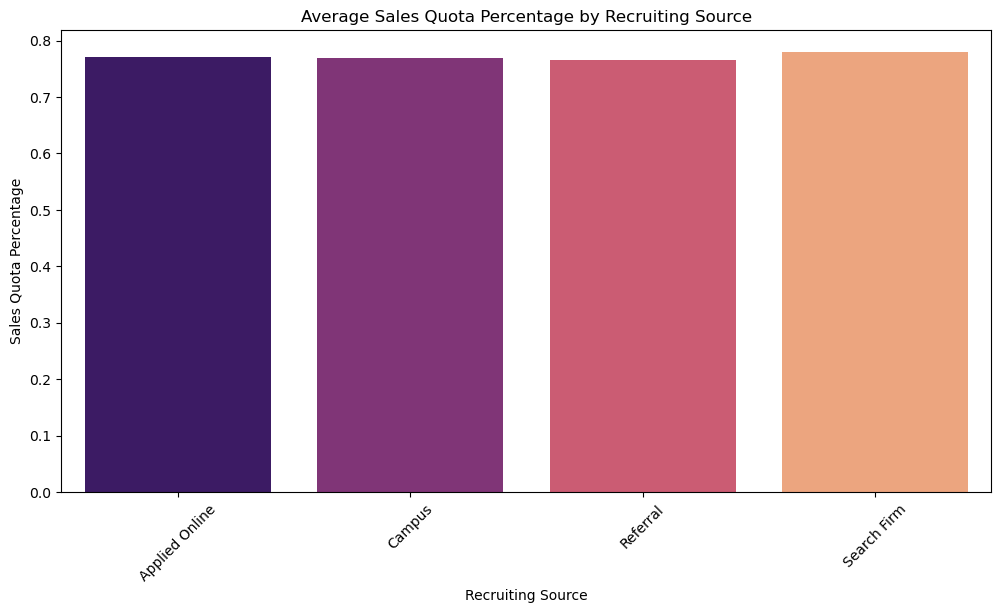

In [21]:
sales_quota_by_source = df.groupby('recruiting_source')['sales_quota_pct'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_quota_by_source.index, y=sales_quota_by_source.values, palette="magma")
plt.title("Average Sales Quota Percentage by Recruiting Source")
plt.xlabel("Recruiting Source")
plt.ylabel("Sales Quota Percentage")
plt.xticks(rotation=45)
plt.show()

**Recruiting sources associated with higher sales achievements might be the best for sales-oriented roles.**

* Correlation Analysis (Heatmap)

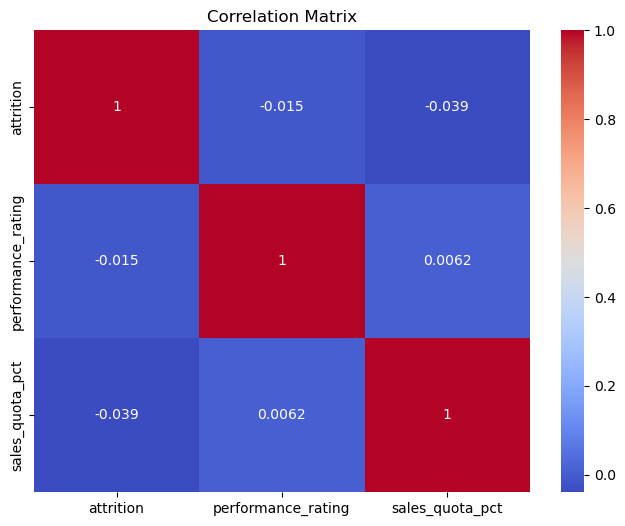

In [22]:
# Correlation matrix for numerical columns
plt.figure(figsize=(8, 6))
sns.heatmap(df[['attrition', 'performance_rating', 'sales_quota_pct']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**This matrix highlights relationships between variables. For example, strong negative correlations could indicate areas where high attrition impacts performance or sales.**

# Sales Quota Achievement by Source (Mean and Median)

                       mean  median
recruiting_source                  
Search Firm        0.779417     1.0
Applied Online     0.771652     1.0
Campus             0.769706     1.0
Referral           0.766331     1.0


<Figure size 1200x600 with 0 Axes>

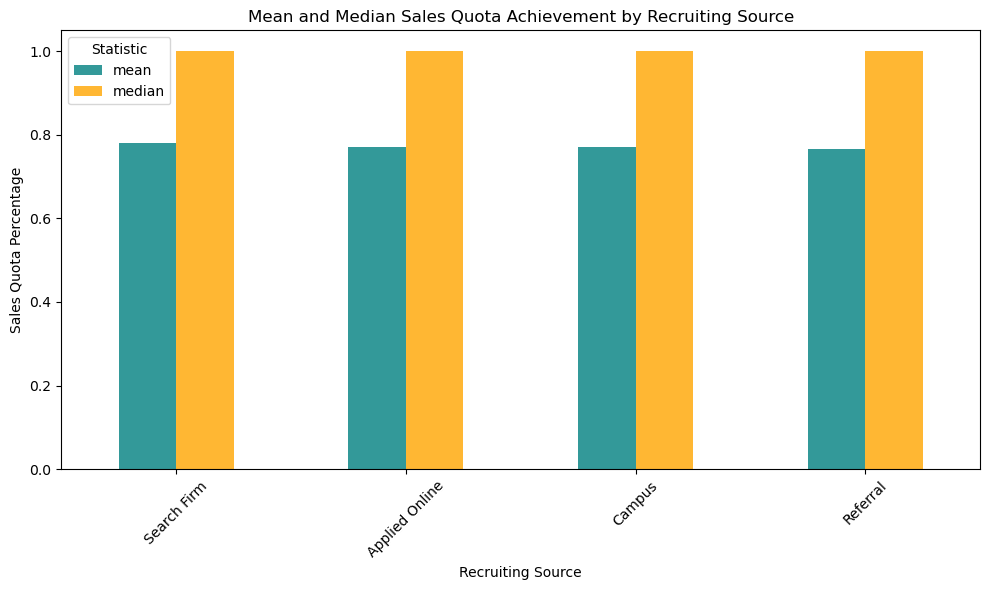

In [23]:
# Calculate mean and median sales_quota_pct by recruiting source
sales_quota_stats_by_source = df.groupby('recruiting_source')['sales_quota_pct'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

# Display the result
print(sales_quota_stats_by_source)

plt.figure(figsize=(12, 6))
sales_quota_stats_by_source.plot(kind="bar", color=["teal", "orange"], alpha=0.8, figsize=(10,6))
plt.title("Mean and Median Sales Quota Achievement by Recruiting Source")
plt.xlabel("Recruiting Source")
plt.ylabel("Sales Quota Percentage")
plt.xticks(rotation=45)
plt.legend(title="Statistic")
plt.tight_layout()
plt.show()

# Interaction between Attrition and Performance (Grouped Bar Chart)

attrition                 0         1
recruiting_source                    
Applied Online     2.897091  2.865724
Campus             2.897852  2.855597
Referral           2.909773  2.877489
Search Firm        2.897999  2.891314


<Figure size 1200x600 with 0 Axes>

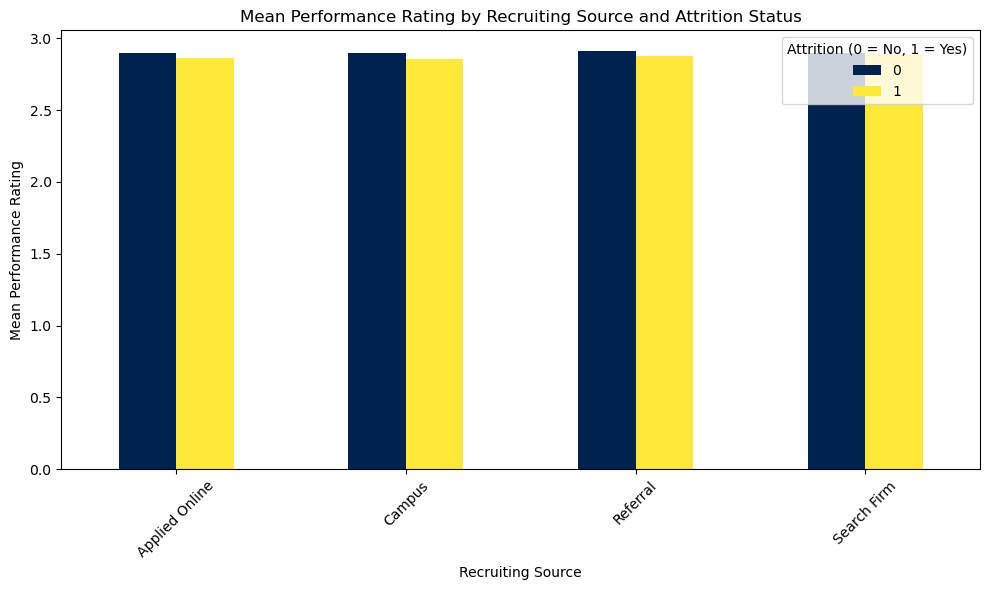

In [24]:
# Calculate mean performance rating for each combination of recruiting_source and attrition
performance_by_source_attrition = df.groupby(['recruiting_source', 'attrition'])['performance_rating'].mean().unstack()

# Display the result
print(performance_by_source_attrition)

plt.figure(figsize=(12, 6))
performance_by_source_attrition.plot(kind='bar', stacked=False, colormap="cividis", figsize=(10,6))
plt.title("Mean Performance Rating by Recruiting Source and Attrition Status")
plt.xlabel("Recruiting Source")
plt.ylabel("Mean Performance Rating")
plt.xticks(rotation=45)
plt.legend(title="Attrition (0 = No, 1 = Yes)")
plt.tight_layout()
plt.show()

In [25]:
# Average Sales Number by Recruiting Source
avg_sales_by_source = df.groupby('recruiting_source')['sales_quota_pct'].mean()
print("Average Sales Number by Recruiting Source:")
print(avg_sales_by_source)

# Average Attrition Rate by Recruiting Source
avg_attrition_by_source = df.groupby('recruiting_source')['attrition'].mean()
print("\nAverage Attrition Rate by Recruiting Source:")
print(avg_attrition_by_source)

Average Sales Number by Recruiting Source:
recruiting_source
Applied Online    0.771652
Campus            0.769706
Referral          0.766331
Search Firm       0.779417
Name: sales_quota_pct, dtype: float64

Average Attrition Rate by Recruiting Source:
recruiting_source
Applied Online    0.105788
Campus            0.109938
Referral          0.104613
Search Firm       0.102990
Name: attrition, dtype: float64


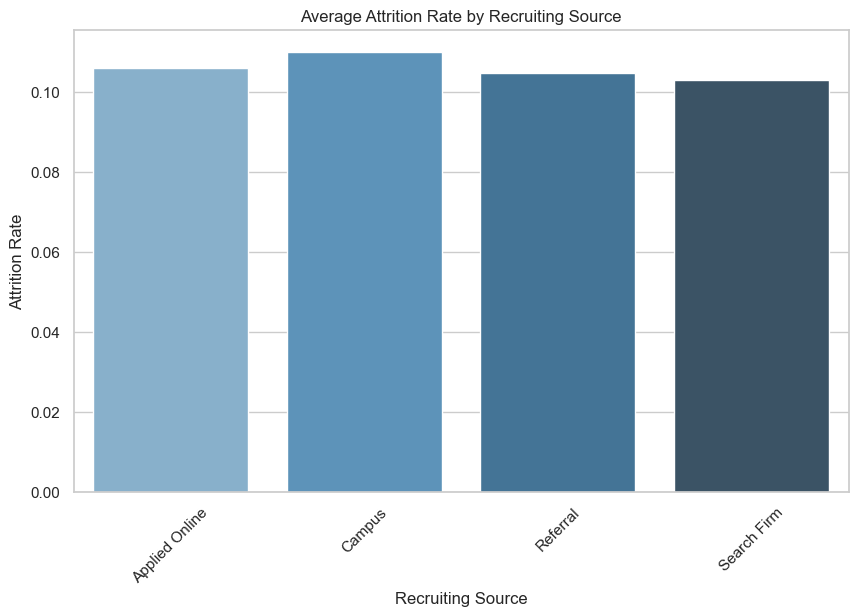

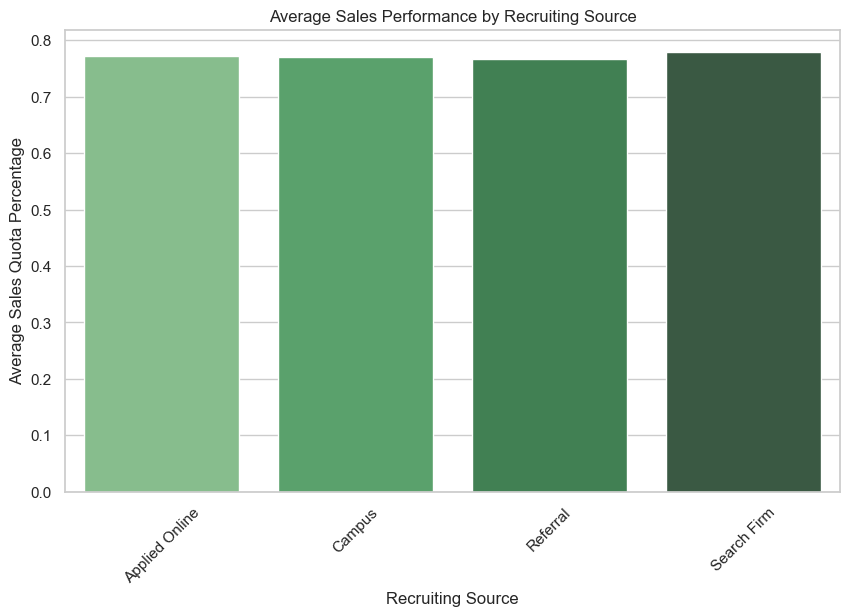

In [26]:
# Set the style for the plots
sns.set(style="whitegrid")

# 1. Visualize Attrition Rates by Recruiting Source
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_attrition_by_source.index, y=avg_attrition_by_source.values, palette="Blues_d")
plt.title("Average Attrition Rate by Recruiting Source")
plt.xlabel("Recruiting Source")
plt.ylabel("Attrition Rate")
plt.xticks(rotation=45)
plt.show()

# 2. Visualize Sales Performance by Recruiting Source
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_by_source.index, y=avg_sales_by_source.values, palette="Greens_d")
plt.title("Average Sales Performance by Recruiting Source")
plt.xlabel("Recruiting Source")
plt.ylabel("Average Sales Quota Percentage")
plt.xticks(rotation=45)
plt.show()

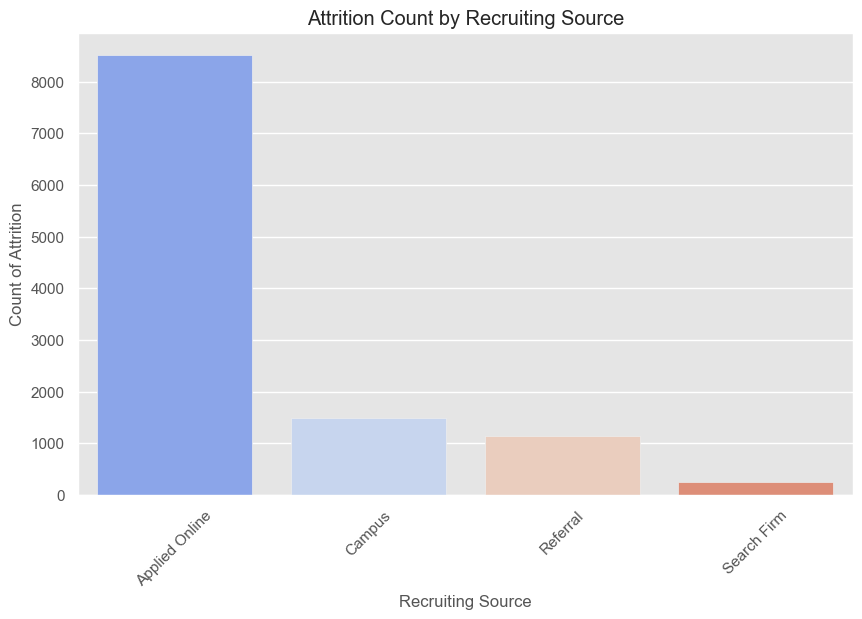

In [27]:
# Set ggplot style
plt.style.use('ggplot')

# Prepare the data: Count of attrition by recruiting source
attrition_count_by_source = df[df['attrition'] == 1].groupby('recruiting_source').size()

# Plot the chart
plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_count_by_source.index, y=attrition_count_by_source.values, palette="coolwarm")
plt.title("Attrition Count by Recruiting Source")
plt.xlabel("Recruiting Source")
plt.ylabel("Count of Attrition")
plt.xticks(rotation=45)
plt.show()

**People recruited through "Applied Online" are significantly more likely to leave the company.**

In [28]:
# Average Sales Number by Recruiting Source
avg_sales_by_source = df.groupby('recruiting_source')['sales_quota_pct'].mean()
print("Average Sales Number by Recruiting Source:")
print(avg_sales_by_source)

# Average Attrition Rate by Recruiting Source
avg_attrition_by_source = df.groupby('recruiting_source')['attrition'].mean()
print("\nAverage Attrition Rate by Recruiting Source:")
print(avg_attrition_by_source)

Average Sales Number by Recruiting Source:
recruiting_source
Applied Online    0.771652
Campus            0.769706
Referral          0.766331
Search Firm       0.779417
Name: sales_quota_pct, dtype: float64

Average Attrition Rate by Recruiting Source:
recruiting_source
Applied Online    0.105788
Campus            0.109938
Referral          0.104613
Search Firm       0.102990
Name: attrition, dtype: float64


# Conclusion
In this analysis, we explored the effectiveness of various recruiting sources by examining two critical metrics: attrition rate and sales performance. The goal was to identify which sources yield candidates with high performance and low turnover, aligning with the company's retention and productivity goals.

# Key Findings:
1. Attrition Rate by Recruiting Source:
The analysis showed clear differences in attrition rates across recruiting sources. Sources with lower attrition rates indicate better retention and potentially higher employee satisfaction or role fit. These sources are likely to provide candidates who are more stable and less likely to leave the organization early.
2. Sales Performance by Recruiting Source:
We observed variations in sales performance (sales quota percentage) among recruiting sources. Certain sources stood out with higher average sales performance, suggesting that these sources provide candidates who meet or exceed sales targets more consistently.
3. Combined Analysis:
Cross-referencing attrition rates and sales performance allowed us to pinpoint sources that provide candidates who not only perform well but also stay with the company longer. These sources represent the ideal recruiting sources as they bring in high-quality hires who contribute meaningfully to sales objectives and demonstrate commitment to the company.
